In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import scipy.stats as sts
import os

#import citipy
import urllib.parse
import requests
import json

In [2]:
#!pip install fuzzywuzzy

In [3]:
from fuzzywuzzy import fuzz, process


C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
#Toronto Police API Call

url_api = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Alcohol_Related/FeatureServer/0/query?where=1%3D1&outFields=YEAR,DATE,District,WardNum,Division,LATITUDE,LONGITUDE,LIGHT,ACCLASS,INJURY,VEHTYPE,DRIVCOND,Neighbourhood,ObjectId&outSR=4326&f=json'
tor_pd = requests.get(url_api)
from pprint import pprint
#pprint (tor_pd.text)

In [5]:
#start transform the data into a json file
tpd_data = tor_pd.json()
#pprint(tpd_data)

In [6]:
#dig into data
tpd_data['features']
tpd_data_ft = tpd_data['features']
#tpd_data_ft
#tor_pd_df = pd.DataFrame(pd.json_normalize(tor_pd.json()))
#tor_pd_df = pd.json_normalize

In [7]:
for k, v, in tpd_data_ft[0].items():
    print(k)
    
#for key and value in... 

attributes
geometry


In [8]:
#normalize the json format, allows for better dataframe ingestion
tor_pd_df = pd.json_normalize(data=tpd_data_ft, record_prefix=None)

In [9]:
#strip excessive string on the dataframe header
tor_pd_df.columns = tor_pd_df.columns.str.strip('attributes.')

In [10]:
tor_pd_df

,YEAR,DATE,Distric,WardNum,Division,LATITUDE,LONGITUDE,LIGHT,ACCLASS,INJURY,VEHTYPE,DRIVCOND,Neighbourhood,ObjectId,geometry.x,geometry.y
0,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Major,None,None,Woodbine-Lumsden (60),1,-79.318797,43.699595
1,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),2,-79.318797,43.699595
2,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,"Automobile, Station Wagon",Normal,Woodbine-Lumsden (60),3,-79.318797,43.699595
3,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),4,-79.318797,43.699595
4,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),5,-79.318797,43.699595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Major,"Automobile, Station Wagon",Normal,Wexford/Maryvale (119),709,-79.315212,43.757865
709,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),710,-79.315212,43.757865
710,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),711,-79.315212,43.757865
711,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),712,-79.315212,43.757865


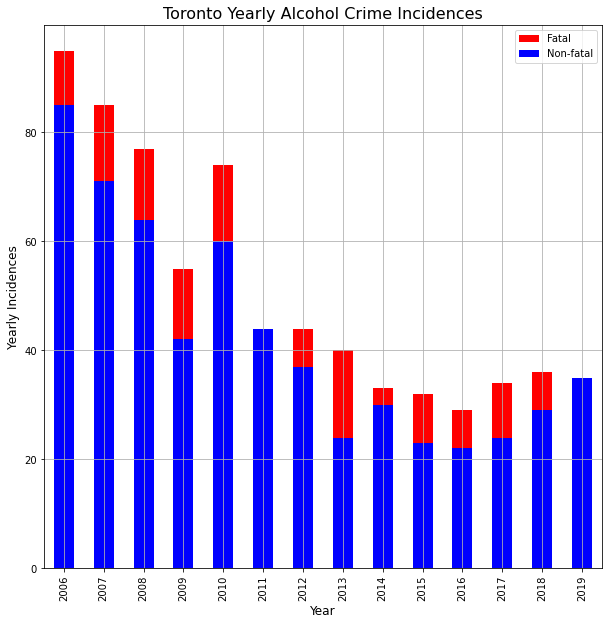

In [20]:
#year totals

year_total_crime = tor_pd_df.groupby(['YEAR']).count()['DATE']

year_total_nonfatal_df = tor_pd_df.loc[lambda tor_pd_df : tor_pd_df['ACCLASS']=='Non-Fatal Injury']
year_total_nonfatal = year_total_nonfatal_df.groupby(['YEAR']).count()['DATE']

plt.figure(figsize =(10,10))

ax1 = year_total_crime.plot.bar(color='red')
ax2 =  year_total_nonfatal.plot.bar(color='blue', grid =True)


h1, l1 = ax1.get_legend_handles_labels()
l1 = ['Fatal', "Non-fatal"]
plt.legend(h1, l1, loc=1)
plt.grid()
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Yearly Incidences', fontsize = 12)
plt.title('Toronto Yearly Alcohol Crime Incidences', loc='center', fontsize=16)
plt.grid()
plt.savefig(os.path.join('Output','Toronto_Total_Alcohol_incidences.png'), dpi=150)
plt.show()


In [23]:
#year_total_crime

In [17]:
year_crime = tor_pd_df['YEAR'].unique()

#to count how many unique neighboorhoods there are

print (len(tor_pd_df['Neighbourhood'].unique()), "neighbourhoods")

#group crimes by neighboorhood and year
neighbourhood_totals = tor_pd_df.groupby(['Neighbourhood']).count()['DATE']




87 neighbourhoods


In [18]:
n_copy = neighbourhood_totals.sort_values(ascending=False)

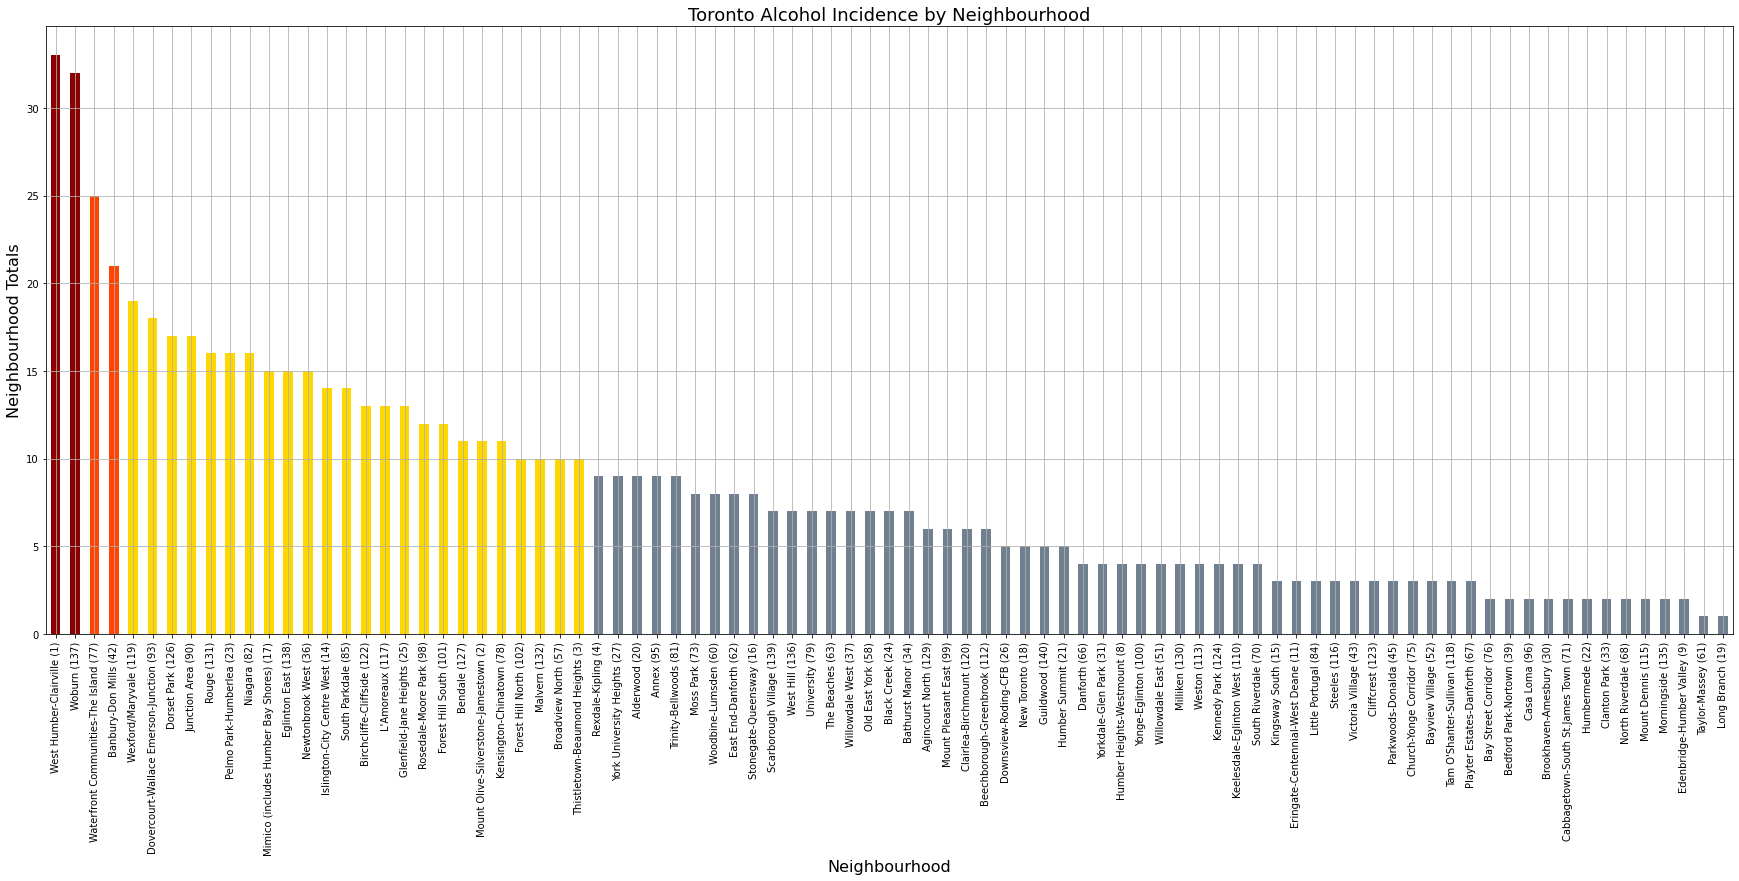

In [19]:
colors = []

for index, value in n_copy.items():
    #print (f'Index : {index}, Value: {value}')
    if value >=30:
        colors.append('darkred')
    elif value >=20:
        colors.append('orangered')
    elif value >=10:
        colors.append('gold')
    else:
        colors.append('slategrey')
    
    
plt.figure(figsize =(24,12))
n_copy.plot.bar(color=colors)
plt.tight_layout()
plt.xlabel('Neighbourhood', fontsize=16)
plt.ylabel('Neighbourhood Totals',fontsize=16 )
plt.title('Toronto Alcohol Incidence by Neighbourhood', loc='center', fontsize=18)
plt.grid()
plt.savefig(os.path.join('Output','Toronto_Cumilative_Alcohol.png'), dpi=150,  bbox_inches='tight')
plt.show()

In [21]:
#Filter by neighbourhoods with grete than 15 incidences
neighbourhood_over15 = n_copy.where(neighbourhood_totals >15)
neighbourhood_over15.dropna(inplace=True)



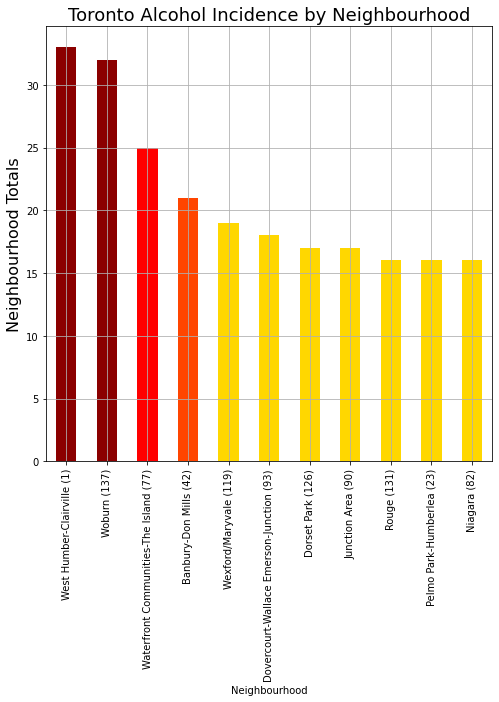

In [64]:
colors15 =[]
for index, value in neighbourhood_over15.items():
    #print (f'Index : {index}, Value: {value}')
    if value >=30:
        colors15.append('darkred')
    elif value >=25:
        colors15.append('red')
    elif value >=20:
        colors15.append('orangered')
    else :
        colors15.append('gold')

plt.figure(figsize=(8,8))
plt.tight_layout()
neighbourhood_over15.plot.bar(color=colors15)
#plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Neighbourhood Totals',fontsize=16 )
plt.title('Toronto Alcohol Incidence by Neighbourhood', loc='center', fontsize=18)
plt.grid()
plt.savefig(os.path.join('Output','Toronto_High_Alcohol_Neighbourhoods.png'), dpi=150,  bbox_inches='tight')
plt.show()


In [23]:
neighbourhoods = tor_pd_df['Neighbourhood'].unique()
neighbourhoods.sort()
#neighbourhoods

In [24]:
#neighbourhood median incomes
gta_income = pd.read_csv(os.path.join('Resources','tor_hh_income_2016_cmhc.csv'), thousands=',')
gta_income.head(10)


,Neighbourhood,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes
0,Agincourt/Malvern,80147,68108,71025,62304
1,Ajax/Pickering,115659,98363,94805,84664
2,Alderwood,102434,83249,84163,73039
3,Aurora,147604,106761,113594,90592
4,Banbury-Don Mills/York Mills,245866,90620,168106,76046
5,Bathurst Manor,95977,69634,79185,62172
6,Bay Street Corridor,85657,48737,65786,44028
7,Bayview Village,96616,67355,76983,58341
8,Bayview Woods-Steeles/Hillcrest Village,96267,74082,79794,65844
9,Bedford Park-Nortown,252266,116672,175773,98522


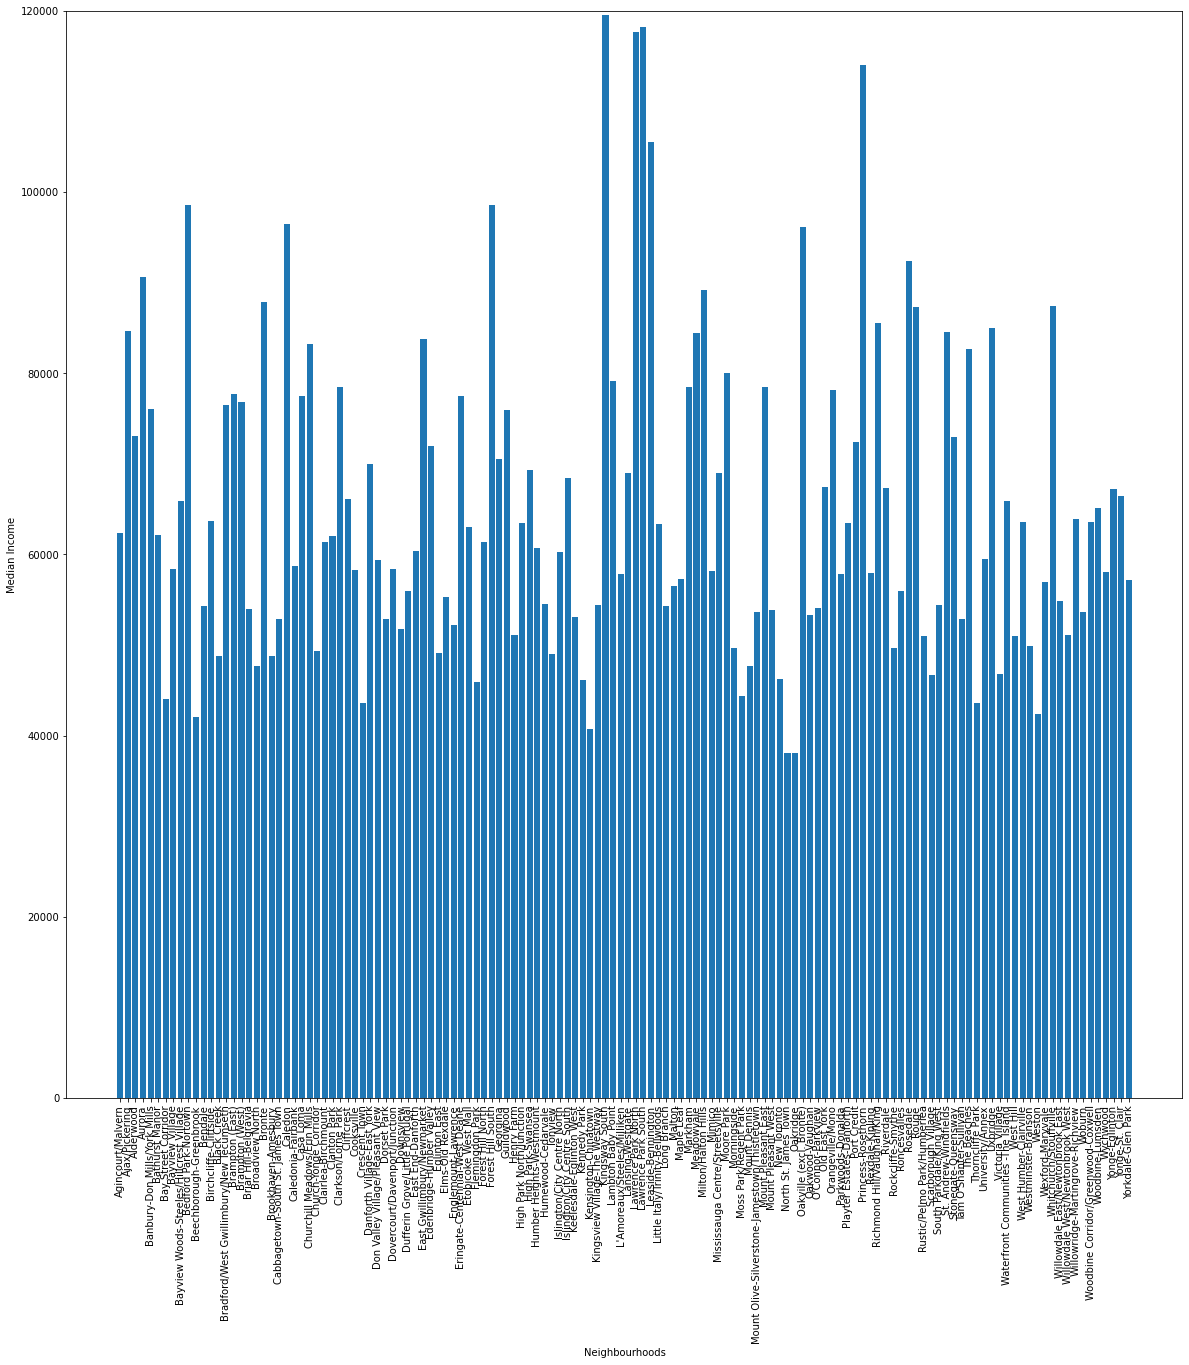

In [25]:
# neighbourhoods_gta = gta_income['Neighbourhood']
#median_income_afttax = gta_income['Median Household Income After Taxes']


plt.figure(figsize =(20,20))
plt.bar(gta_income['Neighbourhood'], gta_income['Median Household Income After Taxes'])
#gta_income.plot(x=['Neighbourhood'], y =['Median Household Income After Taxes'], kind ='bar' )
plt.xticks(fontsize = 10, rotation =90)
plt.xlabel('Neighbourhoods')
plt.ylabel('Median Income')
plt.ylim(0,120000)
plt.savefig(os.path.join('Output','GTA_Income_2016.png'), dpi=300)
# plt.grid()
plt.show()




In [26]:
gdp_data = pd.read_csv(os.path.join('Resources','Canada_GDP_1960-2018.csv'))


In [27]:
gdp_data.sort_values('Date', ascending=True, inplace=True)
gdp_data.head()

,Date,Canada Annual GDP (M),GDP Growth (%),GDP per capita,GDP P.C. Annual Growth,Unnamed: 5
58,1960,40462,NaN,1960,2259,NaN
57,1961,40935,3.10%,1961,2240,-0.80%
56,1962,42227,7.40%,1962,2269,1.30%
55,1963,45030,5.30%,1963,2375,4.70%
54,1964,49378,6.60%,1964,2555,7.60%


In [28]:
gdp_selection = gdp_data.loc[lambda gdp_data : gdp_data ['Date']>=2006]

In [29]:
gdp_year = gdp_selection['Date']
gdp_annual = gdp_selection['Canada Annual GDP (M)']


In [30]:
#aligning dates so that 2019 from DUI/alcohols is dropped
year_crime = year_total_crime.drop(labels=2019)
year_nonfatal = year_total_nonfatal.drop(labels=2019)

years2 = tor_pd_df['YEAR'].sort_values().unique()


In [31]:
gdp_year2 = gdp_year.sort_values()

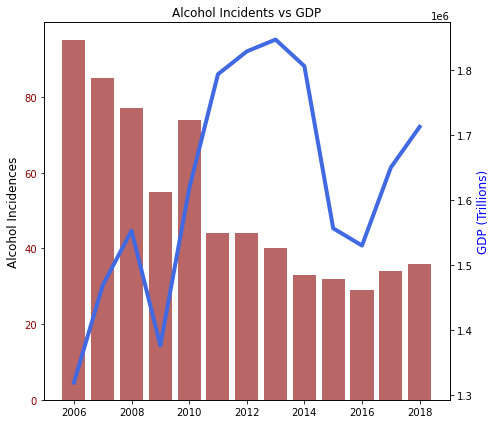

In [36]:
#plt.figure(figsize=(10,10))
fig, ax1 = plt.subplots(figsize=(7,6))


ax1.set_ylabel('Alcohol Incidences', size = 12)  # we already handled the x-label with ax1
ax1.bar(gdp_year2, year_crime, color='darkred', alpha =0.6)
ax1.tick_params(axis='y', labelcolor='darkred')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP (Trillions)', color='blue', size=12)
ax2.plot(gdp_year, gdp_annual, color= 'royalblue', linewidth=4)
ax2.tick_params(axis='y')
plt.title('Alcohol Incidents vs GDP', loc='center')
plt.savefig(os.path.join('Output','Alcohol vs GPD.png'), dpi=150)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [37]:
#using fuzzywuzzy we do a fuzzy match between the differing list of neighbourhoods, the Toronto PD (tor_pd_df)
#and the CMHC list (gta_income)

neighbourhood1 = tor_pd_df['Neighbourhood'].unique()
neighbourhood2 = gta_income['Neighbourhood'].unique()

temp_list =[]
for neigh in neighbourhood1:
    try:
        result, score = process.extractOne(neigh, neighbourhood2, scorer=fuzz.token_set_ratio, score_cutoff=54)
        temp_list.append({'tor_pd_neigh': neigh, 'income_neigh': result, 'Score':score})
        # score_cutoff=80
    except:
        pass
neigh_fix = pd.DataFrame(temp_list)

In [38]:
#check the scores, and select a score target that meets the minimum requirement
neigh_fix


,tor_pd_neigh,income_neigh,Score
0,Woodbine-Lumsden (60),Woodbine-Lumsden,100
1,Mimico (includes Humber Bay Shores) (17),Mimico,100
2,Eglinton East (138),Eglinton East,100
3,Trinity-Bellwoods (81),Little Italy/Trinity-Bellwoods,92
4,York University Heights (27),University/Annex,77
...,...,...,...
78,Steeles (116),Bayview Woods-Steeles/Hillcrest Village,78
79,Tam O'Shanter-Sullivan (118),Tam O'Shanter-Sullivan,100
80,Yonge-Eglinton (100),Yonge-Eglinton,100
81,Edenbridge-Humber Valley (9),Edenbridge-Humber Valley,100


In [39]:
pd.options.display.max_rows = 99
neigh_fix.sort_values('Score',inplace=True,ascending =False)

In [40]:
neigh_fix = neigh_fix.drop_duplicates(subset='tor_pd_neigh', keep='first')

In [41]:
neigh_fix_dict=neigh_fix.set_index('income_neigh').to_dict()['tor_pd_neigh']

In [42]:
gta_income["Neighbourhood_fix"] = gta_income["Neighbourhood"].map(neigh_fix_dict)
#df["B"] = df["A"].map(equiv)

In [43]:
gta_income.dropna(inplace=True)
gta_income.reset_index(inplace=True, drop=True)

In [44]:
gta_income

,Neighbourhood,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes,Neighbourhood_fix
0,Agincourt/Malvern,80147,68108,71025,62304,Agincourt North (129)
1,Alderwood,102434,83249,84163,73039,Alderwood (20)
2,Banbury-Don Mills/York Mills,245866,90620,168106,76046,Banbury-Don Mills (42)
3,Bathurst Manor,95977,69634,79185,62172,Bathurst Manor (34)
4,Bay Street Corridor,85657,48737,65786,44028,Bay Street Corridor (76)
5,Bayview Village,96616,67355,76983,58341,Bayview Village (52)
6,Bayview Woods-Steeles/Hillcrest Village,96267,74082,79794,65844,Steeles (116)
7,Bedford Park-Nortown,252266,116672,175773,98522,Bedford Park-Nortown (39)
8,Beechborough-Greenbrook,62740,45211,54624,42083,Beechborough-Greenbrook (112)
9,Bendale,71591,60292,62300,54318,Bendale (127)


In [45]:
neighbourhood_over15

Neighbourhood
West Humber-Clairville (1)                  33.0
Woburn (137)                                32.0
Waterfront Communities-The Island (77)      25.0
Banbury-Don Mills (42)                      21.0
Wexford/Maryvale (119)                      19.0
Dovercourt-Wallace Emerson-Junction (93)    18.0
Dorset Park (126)                           17.0
Junction Area (90)                          17.0
Rouge (131)                                 16.0
Pelmo Park-Humberlea (23)                   16.0
Niagara (82)                                16.0
Name: DATE, dtype: float64

In [46]:
#Filter gta_income data frame with the list of neighbourhoods over 15 total alcohol incidences
#NB because of limitations of the fuzzywuzzy logic, discrepencies between CMHC and Toronto PD, not all neighbourhoods
#from the original chart will be in the new dataframe

tor_over15 = gta_income.loc[ gta_income.isin({'Neighbourhood_fix':neighbourhood_over15.index})['Neighbourhood_fix'] ]
tor_over15.head(20)



,Neighbourhood,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes,Neighbourhood_fix
2,Banbury-Don Mills/York Mills,245866,90620,168106,76046,Banbury-Don Mills (42)
21,Dorset Park,68617,57986,60703,52823,Dorset Park (126)
22,Dovercourt/Davenport/Junction,80325,65167,68435,58332,Junction Area (90)
54,Rouge,117829,101482,97714,87287,Rouge (131)
55,Rustic/Pelmo Park/Humberlea,73165,55839,63828,50962,Pelmo Park-Humberlea (23)
63,Waterfront Communities -The Island,104994,78479,80760,65912,Waterfront Communities-The Island (77)
65,West Humber-Clairville,81133,70741,71699,63563,West Humber-Clairville (1)
67,Wexford-Maryvale,76778,62837,66343,56998,Wexford/Maryvale (119)
70,Woburn,70455,58921,62213,53645,Woburn (137)


In [47]:
neighbourhood15 = tor_over15['Neighbourhood']
median_income15 = tor_over15['Median Household Income Before Taxes']


In [48]:
alcohol_15 = pd.DataFrame(neighbourhood_over15)
alcohol_15.reset_index(inplace=True)
alcohol_15
tdot_drunks = pd.merge(tor_over15, alcohol_15, how='inner', left_on='Neighbourhood_fix' ,right_on='Neighbourhood')

In [49]:
#check
tdot_drunks

,Neighbourhood_x,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes,Neighbourhood_fix,Neighbourhood_y,DATE
0,Banbury-Don Mills/York Mills,245866,90620,168106,76046,Banbury-Don Mills (42),Banbury-Don Mills (42),21.0
1,Dorset Park,68617,57986,60703,52823,Dorset Park (126),Dorset Park (126),17.0
2,Dovercourt/Davenport/Junction,80325,65167,68435,58332,Junction Area (90),Junction Area (90),17.0
3,Rouge,117829,101482,97714,87287,Rouge (131),Rouge (131),16.0
4,Rustic/Pelmo Park/Humberlea,73165,55839,63828,50962,Pelmo Park-Humberlea (23),Pelmo Park-Humberlea (23),16.0
5,Waterfront Communities -The Island,104994,78479,80760,65912,Waterfront Communities-The Island (77),Waterfront Communities-The Island (77),25.0
6,West Humber-Clairville,81133,70741,71699,63563,West Humber-Clairville (1),West Humber-Clairville (1),33.0
7,Wexford-Maryvale,76778,62837,66343,56998,Wexford/Maryvale (119),Wexford/Maryvale (119),19.0
8,Woburn,70455,58921,62213,53645,Woburn (137),Woburn (137),32.0


In [50]:
n15 = tdot_drunks['Neighbourhood_fix'] #x
income = tdot_drunks['Median Household Income After Taxes'] #y-1
incidences = tdot_drunks['DATE'] #y-2


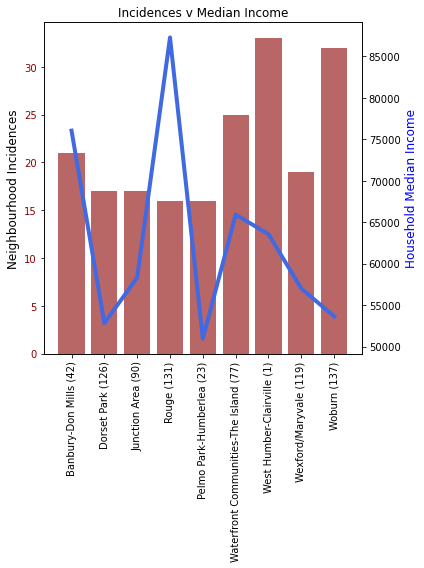

In [53]:
fig, ax1 = plt.subplots(figsize=(6,8))
#ax1.figure(figsize=(10,10))

ax1.set_ylabel('Neighbourhood Incidences', size = 12)  # we already handled the x-label with ax1
ax1.bar(n15, incidences, color='darkred', alpha =0.6)
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_xlabel('Neighbourhoods')
ax2.set_ylabel('Household Median Income', color='blue', size=12)
ax2.plot(n15, income, color= 'royalblue', linewidth=4)
ax2.tick_params(axis='y')
ax2.tick_params(axis='x', labelrotation=90)
plt.title('Incidences v Median Income', loc='center')
#plt.figure(figsize=(8,8))
plt.tight_layout()
plt.savefig(os.path.join('Output','Incidences v Median Income.png'), dpi=150)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [54]:
#let's calculate correlation of median income vs alcohol for the subset

slope, intercept, rvalue, pvalue, stderr, = st.linregress(income, incidences)
reg_value = slope*income + intercept
eqn ='y =' + str(round(slope,4)) + 'x + ' + str(round(intercept,4))
rval = (round(rvalue,4))

print (f'R value {rval}')


R value -0.113


In [55]:
#since the r value of the subset was very low, let's look at the the R value for the entire CMHC/Toronto PD dataset


n_totals_df = pd.DataFrame(neighbourhood_totals)
n_totals_df.reset_index(inplace=True)
#n_totals_df

#merge the two dataframe together, NB 'DATE' is actually the total incidences of alcohol related crimes
merged_df = pd.merge(gta_income, n_totals_df,how='inner', left_on='Neighbourhood_fix' ,right_on='Neighbourhood')
merged_df

,Neighbourhood_x,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes,Neighbourhood_fix,Neighbourhood_y,DATE
0,Agincourt/Malvern,80147,68108,71025,62304,Agincourt North (129),Agincourt North (129),6
1,Alderwood,102434,83249,84163,73039,Alderwood (20),Alderwood (20),9
2,Banbury-Don Mills/York Mills,245866,90620,168106,76046,Banbury-Don Mills (42),Banbury-Don Mills (42),21
3,Bathurst Manor,95977,69634,79185,62172,Bathurst Manor (34),Bathurst Manor (34),7
4,Bay Street Corridor,85657,48737,65786,44028,Bay Street Corridor (76),Bay Street Corridor (76),2
5,Bayview Village,96616,67355,76983,58341,Bayview Village (52),Bayview Village (52),3
6,Bayview Woods-Steeles/Hillcrest Village,96267,74082,79794,65844,Steeles (116),Steeles (116),3
7,Bedford Park-Nortown,252266,116672,175773,98522,Bedford Park-Nortown (39),Bedford Park-Nortown (39),2
8,Beechborough-Greenbrook,62740,45211,54624,42083,Beechborough-Greenbrook (112),Beechborough-Greenbrook (112),6
9,Bendale,71591,60292,62300,54318,Bendale (127),Bendale (127),11


In [56]:
incidences_total = merged_df['DATE']
income_all = merged_df['Median Household Income After Taxes']

In [57]:
slope, intercept, rvalue, pvalue, stderr, = st.linregress(income_all, incidences_total)
reg_value = slope*income + intercept
eqn ='y =' + str(round(slope,4)) + 'x + ' + str(round(intercept,4))
rval = (round(rvalue,4))

print (f'R value {rval}')

R value 0.0211


In [59]:
#lets make a map!!
x_unique = tor_pd_df['geometry.x'].unique()
y_unique = tor_pd_df['geometry.y'].unique()

x_min = x_unique.min()
x_max = x_unique.max()

y_min = y_unique.min()
y_max = y_unique.max()

print(tor_pd_df['geometry.x'].min(),tor_pd_df['geometry.x'].max())
print(tor_pd_df['geometry.y'].min(),tor_pd_df['geometry.y'].max())

-79.62659 -79.14622
43.594245 43.836544999999994


In [60]:
len(y_unique)

217

In [61]:
BBox= (x_min, x_max, y_min, y_max)
tdot_map = plt.imread(os.path.join('Resources','toronto.png'))

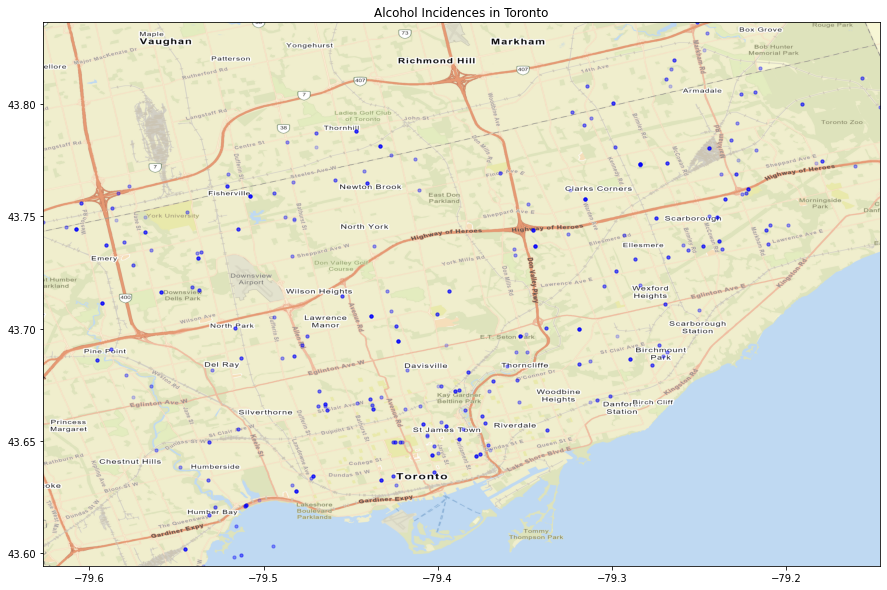

In [62]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(tor_pd_df['geometry.x'], tor_pd_df['geometry.y'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Alcohol Incidences in Toronto')
ax.set_xlim(tor_pd_df['geometry.x'].min(),tor_pd_df['geometry.x'].max())
ax.set_ylim(tor_pd_df['geometry.y'].min(),tor_pd_df['geometry.y'].max())
ax.imshow(tdot_map, zorder=0, extent = BBox, aspect='auto')
plt.savefig(os.path.join('Output','Toronto_map.png'), dpi=150)